<a href="https://colab.research.google.com/github/cnhzgb/MachineL/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.9 MB/s eta 0:00:00


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import os
import shutil
from tqdm import tqdm

import ipdb

device = "cuda" if torch.cuda.is_available() else "cpu"

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5],std=[0.5])])
dataset = datasets.MNIST(root="dataset/", transform=trans, download=True, train=True) # 6W张图片
loader = DataLoader(dataset, batch_size=100, shuffle=True)
batch_num,(image, label) = next(enumerate(loader))
print(image.shape, label.shape) # 100,1,28,28 ; 100

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [6]:
class net(nn.Module):
  def __init__(self):
    super(net, self).__init__()

    self.conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size = 3, stride = 1)
    self.pool = nn.MaxPool2d(kernel_size = 4, stride = 2) # 池化层
    self.relu = nn.ReLU()
    self.dense = nn.Linear(288, 10)

  def forward(self, x): # 100,1,28,28
    x = self.conv(x) # => 100,2,26,26
    x = self.relu(x)
    x = self.pool(x) # => 100,2,12,12
    x = x.view(x.size(0), -1) # => 100,288
    x = self.dense(x) # => 100,10
    return x

model = net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

In [7]:
for epoch in range(1,4):
  total_loss = []
  errorTotal = 0
  for batch_idx, (img, label) in enumerate(loader):
    img = img.to(device)
    label = label.to(device)
    outputs = model(img)
    loss = criterion(outputs, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss.append(loss.item())
    maxV,maxIdx = outputs.max(dim=1)
    errorNum = torch.sum(torch.ne(maxIdx, label)).item()
    errorTotal += errorNum

    if(batch_idx % 100 == 99):
      print("epoch:{} batch:{} loss:{:.2f} mean:{:.2f} error:{}/100 errorTotal:{}/{} {:.2f}%".format(epoch, batch_idx, loss, np.mean(total_loss), errorNum, errorTotal, (batch_idx+1)*100, errorTotal/(batch_idx+1)))

epoch:1 batch:99 loss:2.11 mean:2.20 error:63/100 errorTotal:7809/10000 78.09%
epoch:1 batch:199 loss:1.94 mean:2.11 error:50/100 errorTotal:13069/20000 65.34%
epoch:1 batch:299 loss:1.72 mean:2.01 error:40/100 errorTotal:16907/30000 56.36%
epoch:1 batch:399 loss:1.56 mean:1.91 error:35/100 errorTotal:20144/40000 50.36%
epoch:1 batch:499 loss:1.39 mean:1.81 error:27/100 errorTotal:22946/50000 45.89%
epoch:1 batch:599 loss:1.09 mean:1.71 error:18/100 errorTotal:25526/60000 42.54%
epoch:2 batch:99 loss:1.06 mean:1.10 error:22/100 errorTotal:2371/10000 23.71%
epoch:2 batch:199 loss:1.01 mean:1.05 error:22/100 errorTotal:4605/20000 23.02%
epoch:2 batch:299 loss:0.89 mean:1.00 error:22/100 errorTotal:6718/30000 22.39%
epoch:2 batch:399 loss:0.74 mean:0.96 error:19/100 errorTotal:8725/40000 21.81%
epoch:2 batch:499 loss:0.78 mean:0.92 error:23/100 errorTotal:10569/50000 21.14%
epoch:2 batch:599 loss:0.78 mean:0.89 error:22/100 errorTotal:12481/60000 20.80%
epoch:3 batch:99 loss:0.76 mean:0.6

In [8]:
trans_test = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5],std=[0.5])])
dataset_test = datasets.MNIST(root="dataset/", transform=trans_test, download=True, train=False) # 1W张图片
loader_test = DataLoader(dataset_test, batch_size=100, shuffle=True)
criterion_test = nn.CrossEntropyLoss()

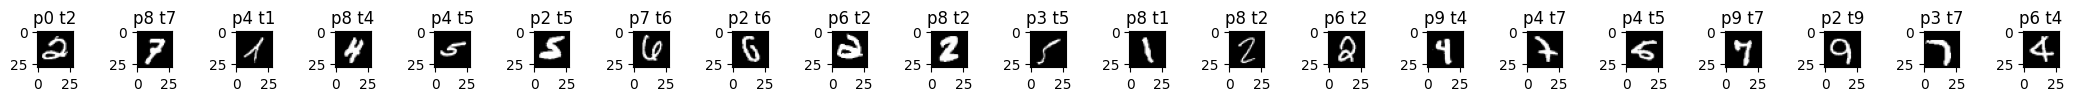

batch:9 loss:0.68 mean:0.58 error:21/100 errorTotal:161/1000 16.10%


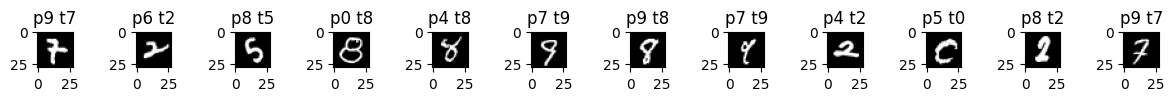

batch:19 loss:0.48 mean:0.55 error:12/100 errorTotal:293/2000 14.65%


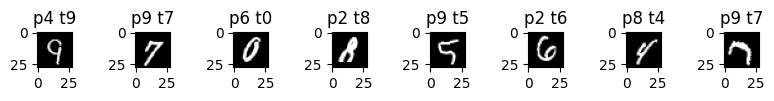

batch:29 loss:0.38 mean:0.52 error:8/100 errorTotal:431/3000 14.37%


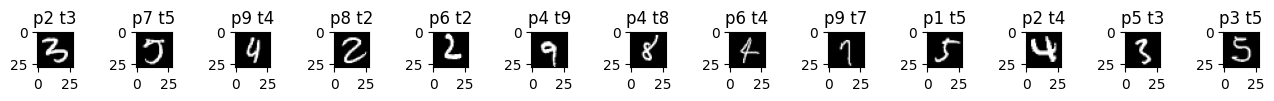

batch:39 loss:0.42 mean:0.53 error:13/100 errorTotal:575/4000 14.38%


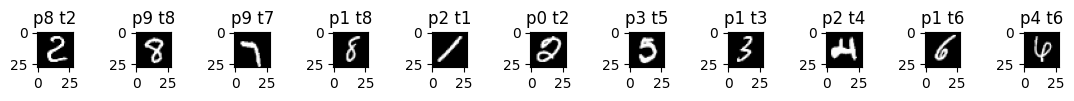

batch:49 loss:0.56 mean:0.53 error:11/100 errorTotal:738/5000 14.76%


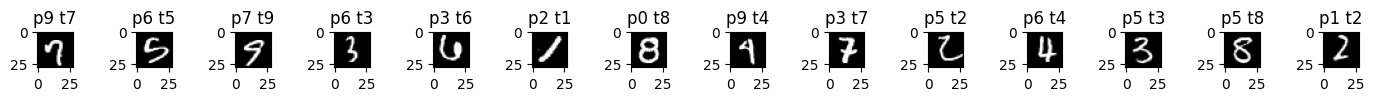

batch:59 loss:0.54 mean:0.53 error:14/100 errorTotal:891/6000 14.85%


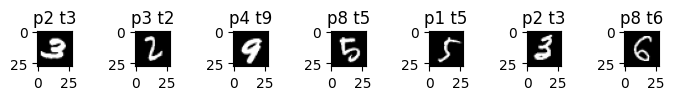

batch:69 loss:0.31 mean:0.53 error:7/100 errorTotal:1023/7000 14.61%


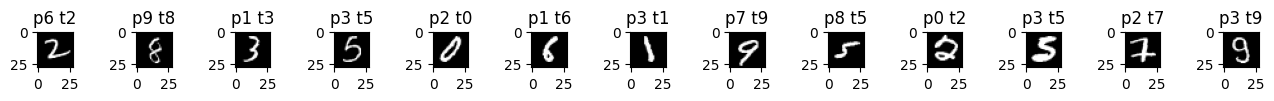

batch:79 loss:0.51 mean:0.54 error:13/100 errorTotal:1174/8000 14.68%


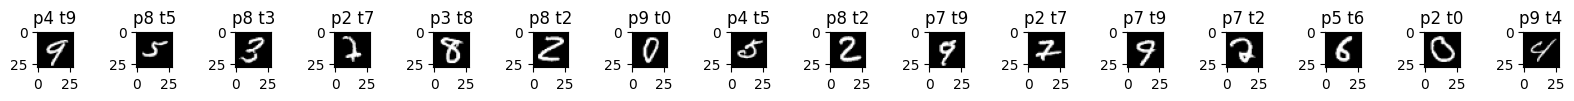

batch:89 loss:0.56 mean:0.54 error:16/100 errorTotal:1326/9000 14.73%


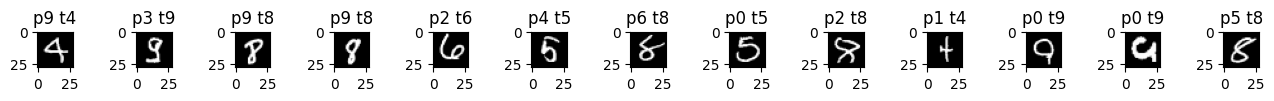

batch:99 loss:0.57 mean:0.54 error:13/100 errorTotal:1467/10000 14.67%


In [9]:
total_loss = []
errorTotal = 0
for batch_idx, (img, label) in enumerate(loader_test): # 1W张图片, 100批, 100,1,28,28
  img = img.to(device)
  label = label.to(device)

  output = model(img)
  loss = criterion_test(output, label)
  total_loss.append(loss.item())

  maxV,maxIdx = output.max(dim=1)
  errorNum = torch.sum(torch.ne(maxIdx, label)).item()
  errorTotal += errorNum

  noMatchIdx = torch.nonzero(torch.ne(maxIdx, label)).view(-1)

  if(batch_idx % 10 == 9):
    fig, axs = plt.subplots(1, errorNum, figsize=(errorNum, 1))
    for i, ax in enumerate(axs.flatten()):
      idx = noMatchIdx[i]
      ax.imshow(img[idx][0].cpu(), cmap='gray')
      ax.set_title('p{} t{}'.format(maxIdx[idx], label[idx]))
    plt.tight_layout()
    plt.show()
    print("batch:{} loss:{:.2f} mean:{:.2f} error:{}/100 errorTotal:{}/{} {:.2f}%".format(batch_idx, loss, np.mean(total_loss), errorNum, errorTotal, (batch_idx+1)*100, errorTotal/(batch_idx+1)))